#### 1. Implement the Perceptron algorithm to classify the dataset in “train.mat”. 
- Plot the classification results, including the decision boundary created by the perceptron model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

# Load the dataset
data = loadmat('train.mat')
X_train = np.column_stack((data['x1'], data['x2']))
y_train = data['y'].flatten()

In [2]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        y_ = np.where(y <= 0, -1, 1)

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = np.sign(linear_output)

                if y_[idx] * y_predicted <= 0:
                    self.weights += self.learning_rate * y_[idx] * x_i
                    self.bias += self.learning_rate * y_[idx]

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.sign(linear_output)
    

# Train the Perceptron
perceptron = Perceptron(learning_rate=0.01, n_iters=1000)
perceptron.fit(X_train, y_train)

# Predict the training data
y_pred = perceptron.predict(X_train)


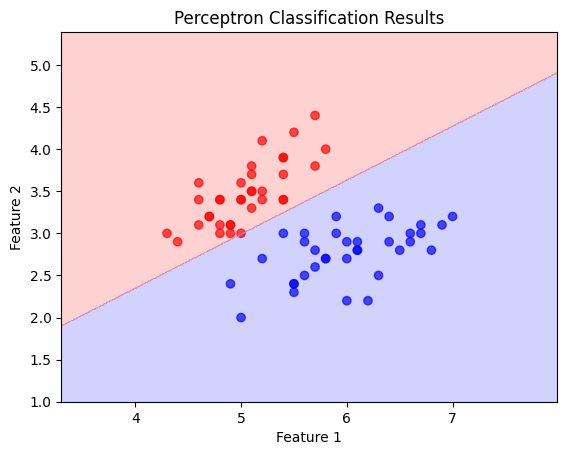

In [3]:

# Plot the classification results
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr', alpha=0.7)
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2, cmap='bwr')
plt.title('Perceptron Classification Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

#### 2. Construct and train three neural networks with 3, 10, and 50 hidden layers, respectively. 
- Each hidden layer should contain five neurons and use the ReLU activation function. 
- Train each network on “train.mat” and evaluate them on the test dataset “test.mat”. 
- Report the test error (percentage of misclassified samples) for each neural network

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from scipy.io import loadmat

# Load the datasets
train_data = loadmat('train.mat')
test_data = loadmat('test.mat')

X_train = np.column_stack((train_data['x1'], train_data['x2']))
y_train = train_data['y'].flatten()
X_test = np.column_stack((test_data['x1'], test_data['x2']))
y_test = test_data['y'].flatten()

# Convert labels to binary (0, 1)
y_train = np.where(y_train <= 0, 0, 1)
y_test = np.where(y_test <= 0, 0, 1)

In [5]:

def create_model(hidden_layers):
    model = Sequential()
    model.add(Dense(5, input_dim=2, activation='relu'))
    for _ in range(hidden_layers - 1):
        model.add(Dense(5, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
    return model

hidden_layers_list = [3, 10, 50]
test_errors = {}

for hidden_layers in hidden_layers_list:
    model = create_model(hidden_layers)
    model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)
    _, accuracy = model.evaluate(X_test, y_test, verbose=0)
    test_error = (1 - accuracy) * 100
    test_errors[hidden_layers] = test_error
    print(f'Test error for {hidden_layers} hidden layers: {test_error:.2f}%')

# Print the test errors
print('ReLU Test Errors:')
for hidden_layers, test_error in test_errors.items():
    print(f'Hidden layers: {hidden_layers}, Test error: {test_error:.2f}%')

e:\project\deep-learning\hw1\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test error for 3 hidden layers: 3.33%
Test error for 10 hidden layers: 50.00%
Test error for 50 hidden layers: 50.00%
ReLU Test Errors:
Hidden layers: 3, Test error: 3.33%
Hidden layers: 10, Test error: 50.00%
Hidden layers: 50, Test error: 50.00%


#### 3. If you replace the ReLU activation function with the Sigmoid activation function for all neurons, how does this affect the performance of the three neural networks?
- Report and discuss your observations for each model.

Ans：Sigmoid 函數會將輸出壓縮在 0 到 1 的範圍內，相較於 ReLU，學習速度更慢，並且在層數稍多時可能出現梯度消失問題。
對每個模型的影響：
- 淺層網絡（3 層）：
    由於梯度需要傳遞的層數較少，Sigmoid 的影響較小，性能下降不明顯。

- 較深網絡（10 層）：
    梯度消失問題開始顯現，模型難以訓練，性能明顯下降。

- 深層網絡（50 層）：
    Sigmoid 激活函數的缺陷在深層網絡中完全暴露，模型幾乎無法學習，性能非常差。

In [6]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from scipy.io import loadmat

# Load the datasets
train_data = loadmat('train.mat')
test_data = loadmat('test.mat')

X_train = np.column_stack((train_data['x1'], train_data['x2']))
y_train = train_data['y'].flatten()
X_test = np.column_stack((test_data['x1'], test_data['x2']))
y_test = test_data['y'].flatten()

# Convert labels to binary (0, 1)
y_train = np.where(y_train <= 0, 0, 1)
y_test = np.where(y_test <= 0, 0, 1)

In [7]:

def create_model(hidden_layers):
    model = Sequential()
    model.add(Dense(5, input_dim=2, activation='sigmoid'))
    for _ in range(hidden_layers - 1):
        model.add(Dense(5, activation='sigmoid'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
    return model

hidden_layers_list = [3, 10, 50]
test_errors = {}

for hidden_layers in hidden_layers_list:
    model = create_model(hidden_layers)
    model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)
    _, accuracy = model.evaluate(X_test, y_test, verbose=0)
    test_error = (1 - accuracy) * 100
    test_errors[hidden_layers] = test_error
    print(f'Test error for {hidden_layers} hidden layers: {test_error:.2f}%')

# Print the test errors
print('Sigmoid Test Errors:')
for hidden_layers, test_error in test_errors.items():
    print(f'Hidden layers: {hidden_layers}, Test error: {test_error:.2f}%')

Test error for 3 hidden layers: 3.33%
Test error for 10 hidden layers: 3.33%
Test error for 50 hidden layers: 50.00%
Sigmoid Test Errors:
Hidden layers: 3, Test error: 3.33%
Hidden layers: 10, Test error: 3.33%
Hidden layers: 50, Test error: 50.00%


#### 4. The MNIST dataset consists of images of handwritten digits, with a training set of 60,000 examples and a test set of 10,000 examples. The dataset can be downloaded from http://yann.lecun.com/exdb/mnist/

In [8]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the images to the range [0, 1]
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [9]:
# 4-1

# Construct the neural network model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=2)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test accuracy on clean images: {test_accuracy:.4f}')

Epoch 1/10


e:\project\deep-learning\hw1\.venv\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1500/1500 - 4s - 3ms/step - accuracy: 0.9202 - loss: 0.2701 - val_accuracy: 0.9557 - val_loss: 0.1438
Epoch 2/10
1500/1500 - 5s - 3ms/step - accuracy: 0.9659 - loss: 0.1137 - val_accuracy: 0.9654 - val_loss: 0.1091
Epoch 3/10
1500/1500 - 5s - 3ms/step - accuracy: 0.9765 - loss: 0.0780 - val_accuracy: 0.9712 - val_loss: 0.0967
Epoch 4/10
1500/1500 - 5s - 3ms/step - accuracy: 0.9819 - loss: 0.0577 - val_accuracy: 0.9687 - val_loss: 0.1054
Epoch 5/10
1500/1500 - 5s - 3ms/step - accuracy: 0.9852 - loss: 0.0457 - val_accuracy: 0.9709 - val_loss: 0.1022
Epoch 6/10
1500/1500 - 4s - 3ms/step - accuracy: 0.9894 - loss: 0.0347 - val_accuracy: 0.9735 - val_loss: 0.0988
Epoch 7/10
1500/1500 - 6s - 4ms/step - accuracy: 0.9899 - loss: 0.0319 - val_accuracy: 0.9753 - val_loss: 0.1016
Epoch 8/10
1500/1500 - 6s - 4ms/step - accuracy: 0.9922 - loss: 0.0242 - val_accuracy: 0.9731 - val_loss: 0.1016
Epoch 9/10
1500/1500 - 7s - 5ms/step - accuracy: 0.9933 - loss: 0.0216 - val_accuracy: 0.9752 - val_loss: 0

In [10]:
# 4-2

import random
import numpy as np

# Function to add salt-and-pepper noise to images
def add_salt_and_pepper_noise(images, noise_level=0.1):
    noisy_images = images.copy()
    num_samples, img_size, _ = images.shape
    num_pixels = img_size * img_size
    for i in range(num_samples):
        num_noisy_pixels = int(noise_level * num_pixels)
        noisy_pixels = random.sample(range(num_pixels), num_noisy_pixels)
        for pixel in noisy_pixels:
            x, y = divmod(pixel, img_size)
            noisy_images[i, x, y] = 255 if random.random() < 0.5 else 0
    return noisy_images

# Add salt-and-pepper noise to the test images
X_test_noisy = add_salt_and_pepper_noise(X_test * 255) / 255

# Evaluate the model on the noisy test set
test_loss_noisy, test_accuracy_noisy = model.evaluate(X_test_noisy, y_test, verbose=0)
print(f'Test accuracy on noisy images: {test_accuracy_noisy:.4f}')

Test accuracy on noisy images: 0.8473


In [11]:
# 4-3

# Add salt-and-pepper noise to the training images
X_train_noisy = add_salt_and_pepper_noise(X_train * 255) / 255

# Construct a new neural network model
model_noisy = Sequential([
    Input(shape=(28, 28)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model_noisy.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model on the noisy training data
model_noisy.fit(X_train_noisy, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=2)

# Evaluate the model on the noisy test set
test_loss_noisy_retrained, test_accuracy_noisy_retrained = model_noisy.evaluate(X_test_noisy, y_test, verbose=0)
print(f'Test accuracy on noisy images after retraining: {test_accuracy_noisy_retrained:.4f}')

NameError: name 'Input' is not defined

Observations and Discussion
Test Accuracy on Clean Images: The initial model trained on clean images should have a high accuracy on the clean test set.
Test Accuracy on Noisy Images: The accuracy will likely drop when evaluating the model on noisy images, as the model was not trained to handle noise.
Retrained Model on Noisy Images: Retraining the model on noisy images should improve its robustness to noise, resulting in better accuracy on the noisy test set compared to the initial model.
Run the code and compare the accuracies to draw specific conclusions about the impact of noise and retraining on the model's performance.

